**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


In [37]:
plt.style.use('classic')
random.seed(50)

## import train and test data for Classification

In [38]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [39]:
C_train.isna().sum()

Polarization_Bool    0
retweetCount         0
dtype: int64

## Drop nan for classification Data

In [40]:
C_train =C_train.dropna()

In [41]:
C_train.head()

,Polarization_Bool,retweetCount
0,1,450
1,0,1593
2,0,1062
3,1,260
4,1,271


In [42]:
C_test.isna().sum()

Polarization_Bool    0
retweetCount         0
dtype: int64

## import train and test data for Regression

In [43]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [44]:
R_train.isna().sum()

Polarization_value    0
retweetCount          0
dtype: int64

In [45]:
R_train=R_train.dropna()

In [46]:
R_test.isna().sum()

Polarization_value    0
retweetCount          0
dtype: int64

In [47]:
R_train.head()

,Polarization_value,retweetCount
0,0.437500,450
1,0.084848,1593
2,0.000000,1062
3,0.320833,260
4,0.300000,271


In [48]:
R_test.head()

,Polarization_value,retweetCount
4000,0.080000,465
4001,0.233333,751
4002,0.200000,5597
4003,0.400000,235
4004,0.000000,7541


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [49]:
C_train.head()

,Polarization_Bool,retweetCount
0,1,450
1,0,1593
2,0,1062
3,1,260
4,1,271


In [50]:
X_train = pd.DataFrame(np.array(C_train['retweetCount']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Polarization_Bool'].astype(int))

In [51]:
C_test.head()

,Polarization_Bool,retweetCount
4000,0,465
4001,1,751
4002,1,5597
4003,1,235
4004,0,7541


In [52]:
X_test = pd.DataFrame(np.array(C_test['retweetCount']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Polarization_Bool'].astype(int))

## Import base packages

In [53]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [56]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

## Evaluations

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60      1115
           1       0.45      0.36      0.40       884

    accuracy                           0.52      1999
   macro avg       0.50      0.50      0.50      1999
weighted avg       0.51      0.52      0.51      1999



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


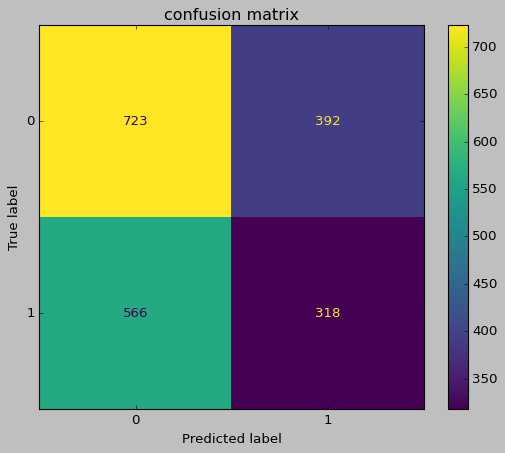

In [58]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


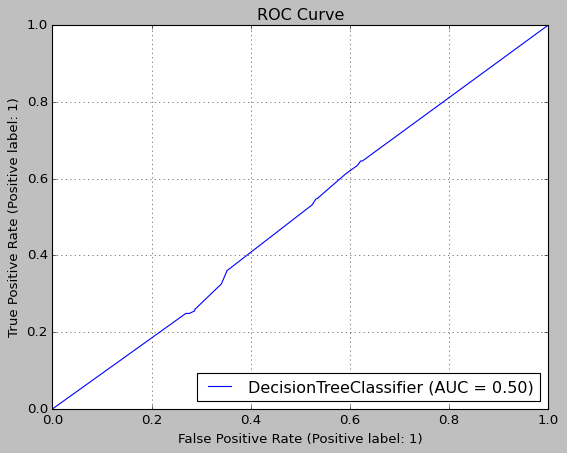

In [59]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-61-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [62]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1115
           1       0.44      0.44      0.44       884

    accuracy                           0.50      1999
   macro avg       0.50      0.50      0.50      1999
weighted avg       0.50      0.50      0.50      1999



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


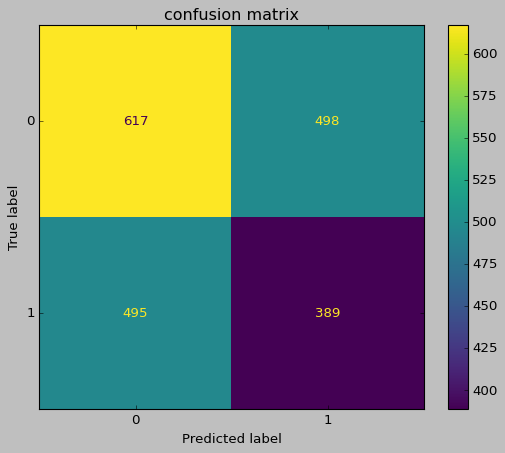

In [63]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


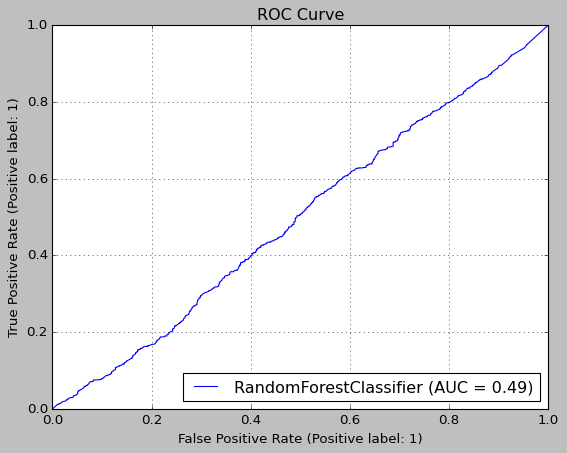

In [64]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1115
           1       0.44      1.00      0.61       884

    accuracy                           0.44      1999
   macro avg       0.22      0.50      0.31      1999
weighted avg       0.20      0.44      0.27      1999



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


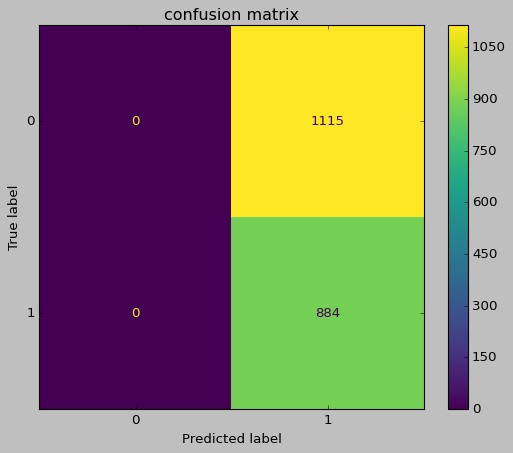

In [68]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [71]:
#!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [72]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [73]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [74]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [75]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    4000
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12331.9 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based

In [76]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [77]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.557779,0.557779,0.000000,0.000000,0.000000,0.552,0.004598,0.016033,2.340197,0.004598,0.016033,2.340197,1,True,4
1,CatBoost,0.557779,0.557779,0.000000,0.000000,0.000000,0.552,0.005197,0.021949,2.805742,0.005197,0.021949,2.805742,1,True,7
2,LightGBMXT,0.557779,0.557779,0.000000,0.000000,0.000000,0.552,0.007229,0.007546,5.107972,0.007229,0.007546,5.107972,1,True,3
3,NeuralNetTorch,0.557779,0.557779,0.000000,0.000000,0.000000,0.552,0.060606,0.006099,2.319385,0.060606,0.006099,2.319385,1,True,12
4,NeuralNetFastAI,0.550775,0.550775,0.440678,0.058824,0.103792,0.556,0.135311,0.011377,10.938661,0.135311,0.011377,10.938661,1,True,10
5,LightGBMLarge,0.549275,0.549275,0.185185,0.005656,0.010977,0.558,0.019501,0.004765,0.571826,0.019501,0.004765,0.571826,1,True,13
6,XGBoost,0.544772,0.544772,0.462428,0.180995,0.260163,0.532,0.053753,0.004113,0.171785,0.053753,0.004113,0.171785,1,True,11
7,WeightedEnsemble_L2,0.543272,0.543272,0.428571,0.098416,0.160074,0.562,0.626243,0.188396,7.588321,0.006005,0.002039,0.776220,2,True,14
8,KNeighborsDist,0.508754,0.508754,0.435526,0.374434,0.402676,0.508,0.028004,0.006441,0.839672,0.028004,0.006441,0.839672,1,True,2
9,KNeighborsUnif,0.499750,0.499750,0.428571,0.393665,0.410377,0.524,0.018252,0.013800,0.827259,0.018252,0.013800,0.827259,1,True,1


# Machine Learning Regression

## important global packages

In [78]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [79]:
R_train.head()

,Polarization_value,retweetCount
0,0.437500,450
1,0.084848,1593
2,0.000000,1062
3,0.320833,260
4,0.300000,271


In [80]:
X_train = pd.DataFrame(R_train['retweetCount'])
y_train = pd.DataFrame(abs(R_train['Polarization_value']))

In [81]:
R_test.head()

,Polarization_value,retweetCount
4000,0.080000,465
4001,0.233333,751
4002,0.200000,5597
4003,0.400000,235
4004,0.000000,7541


In [82]:
X_test = pd.DataFrame(R_test['retweetCount'])
y_test = pd.DataFrame(R_test['Polarization_value'])

## Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-84-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [85]:
# calculate R2
from sklearn.metrics import r2_score

In [86]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.35529917535597644


In [87]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.218941
1,0.056793
2,0.287637
3,0.208741
4,0.304542
...,...
1994,0.202309
1995,0.182248
1996,0.091593
1997,0.184062


R-squared: 8.597988633451958e-05


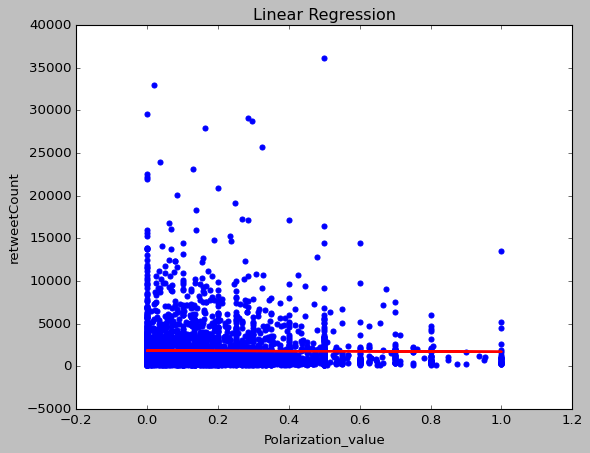

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
df = R_train

# Extract the features and target variables
X = df['Polarization_value'].values.reshape(-1, 1)
y = df['retweetCount'].values

# Train a linear regression model
reg = LinearRegression().fit(X, y)

# Use the model to make predictions
y_pred = reg.predict(X)

# Calculate the R-squared value of the model
r2 = reg.score(X, y)

# Print the R-squared value
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Polarization_value')
plt.ylabel('retweetCount')
plt.show()


<ipython-input-92-8f5b6d932aec>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


R-squared: -0.34924490361484617


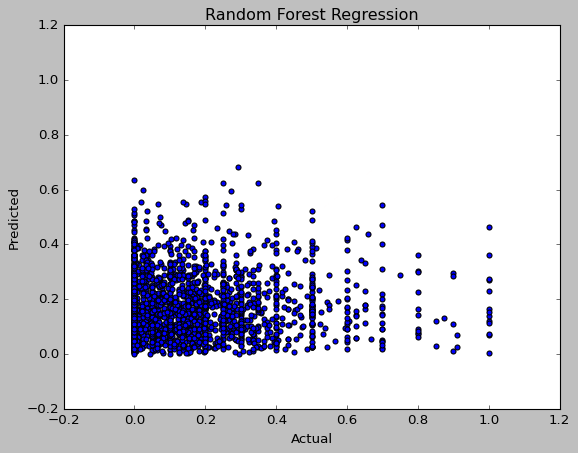

In [92]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a random forest regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared value of the model on the test set
r2 = reg.score(X_test, y_test)

# Print the R-squared value
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--', linewidth=.0001)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()
